# Create venv

In [ ]:
!uv venv --python 3.8 && uv init 

In [ ]:
!source .venv/bin/activate && uv add ipykernel

# Install Blurr Lib

In [ ]:
!git clone https://github.com/ohmeow/blurr.git && cd blurr && uv pip install -e ".[dev]"

# Install Lib


In [ ]:
!uv add protobuf
!uv add pandas==1.5.2
!uv add bert_score 
!uv add sacrebleu
!uv add nltk
!uv add wandb

Resolved 134 packages in 4ms
Audited 87 packages in 0.03ms


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Resolved 134 packages in 4ms
Audited 87 packages in 0.03ms


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Resolved 134 packages in 4ms
Audited 87 packages in 0.03ms


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Resolved 134 packages in 4ms
Audited 87 packages in 0.03ms


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


⠙ sum-med==0.1.0                                                                

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Resolved 139 packages in 437ms                                       
Audited 90 packages in 0.03ms                                        


# Clone model

In [ ]:
!mkdir models && cd models && git clone https://huggingface.co/google/pegasus-large

# Check version

In [27]:
!pip show pandas datasets huggingface_hub transformers torch

Name: pandas
Version: 1.5.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /home/nghiapd/Code/sum-med/.venv/lib/python3.8/site-packages
Requires: numpy, python-dateutil, pytz
Required-by: datasets, fastai
---
Name: datasets
Version: 2.0.0
Summary: HuggingFace community-driven open-source library of datasets
Home-page: https://github.com/huggingface/datasets
Author: HuggingFace Inc.
Author-email: thomas@huggingface.co
License: Apache 2.0
Location: /home/nghiapd/Code/sum-med/.venv/lib/python3.8/site-packages
Requires: aiohttp, dill, fsspec, huggingface-hub, multiprocess, numpy, packaging, pandas, pyarrow, requests, responses, tqdm, xxhash
Required-by: blurr
---
Name: huggingface-hub
Version: 0.33.4
Summary: Client library to download and publish models, datasets and other repos on the huggingface.co hub
Home-page: h

# Load Lib

In [1]:
import pandas as pd
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

/home/nghiapd/Code/sum-med/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
!python -m nltk.downloader all

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


/home/nghiapd/.local/share/uv/python/cpython-3.8.20-linux-x86_64-gnu/lib/python3.8/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /home/nghiapd/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Plot dataset

In [3]:
def read_tsv_file(file_path):
    """
    Read a TSV (Tab-Separated Values) file and return a pandas DataFrame
    
    Args:
        file_path (str): Path to the TSV file
    
    Returns:
        pd.DataFrame: DataFrame containing the TSV data
    """
    df = pd.read_csv('medical-sum/train.tsv', sep='\t', header=None, names=['text', 'summary'])
     
    return df

In [ ]:
train_data = read_tsv_file('medical-summarization/train.tsv')
train_data

# Convert dataset

In [ ]:
valid_data = read_tsv_file('medical-sum/valid.tsv')
test_data = read_tsv_file('medical-sum/test.tsv')

In [5]:
train_data.to_parquet('parquet-datasets/train.parquet', index=False)
valid_data.to_parquet('parquet-datasets/valid.parquet', index=False)
test_data.to_parquet('parquet-datasets/test.parquet', index=False)

# Check parquet

In [2]:
df_parquet = pd.read_parquet('parquet-datasets/train.parquet')
print(df_parquet)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          text  \
0                                                                                                                                                                                   Cho em hỏi . Năm nay em 18 rồi mà vẫn bị hẹp với lại dương vật của em bị cong sang trái 30-35 độ thì có bị sao không ạ ? Nguyễn Hậu ( 2001 ) Trả lời : Để biết chính xác tình trạng dương vật cong và hẹp của em n

# Process data

In [2]:
train_data_parquet = pd.read_parquet('parquet-datasets/train.parquet')

In [3]:
train_data_parquet = pd.DataFrame(train_data_parquet)

In [4]:
train_data_parquet['text'] = train_data_parquet['text'].apply(lambda x: x.replace('\n',''))

In [5]:
train_data_parquet = train_data_parquet.head(100)
train_data_parquet.shape

(100, 2)

In [6]:
from transformers import BartForConditionalGeneration

pretrained_model_name = "models/bart-base"
hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(pretrained_model_name, model_cls=BartForConditionalGeneration)

In [7]:
hf_arch, type(hf_config), type(hf_tokenizer), type(hf_model)

('bart',
 transformers.models.bart.configuration_bart.BartConfig,
 transformers.models.bart.tokenization_bart_fast.BartTokenizerFast,
 transformers.models.bart.modeling_bart.BartForConditionalGeneration)

In [8]:
preprocessor = SummarizationPreprocessor(
    hf_tokenizer,
    id_attr="id",
    text_attr="text",
    target_text_attr="summary",
    max_input_tok_length=512,
    max_target_tok_length=128,
    min_summary_char_length=30
)

In [9]:
import warnings
warnings.filterwarnings('ignore')

proc_df = preprocessor.process_df(train_data_parquet)

In [10]:
text_gen_kwargs = default_text_gen_kwargs(hf_config, hf_model, task="summarization")

# Initializing Seq2Seq Tokenizer
batch_tokenize_transform = Seq2SeqBatchTokenizeTransform(
  hf_arch, hf_config, hf_tokenizer, hf_model, text_gen_kwargs=text_gen_kwargs
)

blocks = (Seq2SeqTextBlock(batch_tokenize_tfm = batch_tokenize_transform), noop)
dblock = DataBlock(blocks=blocks, get_x=ColReader( "proc_text"), get_y=ColReader("proc_summary" ), splitter=RandomSplitter())

In [11]:
dls = dblock.dataloaders(proc_df, bs=2)

In [12]:
summarization_metrics = {
  "rouge": {
      "compute_kwargs": {"rouge_types" : ["rouge1", "rouge2", "rougeL"],
          "use_stemmer": True
      },
      "returns": ["rouge1", "rouge2", "rougeL"],
  },
  "bertscore": {"compute_kwargs": {"lang" : "vi"},
  "returns": ["precision", "recall", "f1"]
  },
  "bleu": {"returns": "bleu"},
  "meteor" : {"returns": "meteor"},
  "sacrebleu": {"returns" : "score"}
}

In [13]:
# Initialize Model
model = BaseModelWrapper(hf_model) 

# Initialize learner callback
learn_cbs = [BaseModelCallback]

# Callback for calculation of metrics
fit_cbs = [Seq2SeqMetricsCallback(custom_metrics=summarization_metrics, calc_every="epoch")]

# Initialize Fast.AI Learner
learn = Learner(
  dls,
  model, 
  opt_func=partial(Adam),
  loss_func=PreCalculatedCrossEntropyLoss(),
  cbs=learn_cbs,
  splitter=partial(blurr_seq2seq_splitter, arch=hf_arch),
)

# Setting precision to 16-bit floating
learn = learn.to_fp16()
learn.freeze()

[nltk_data] Downloading package wordnet to /home/nghiapd/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/nghiapd/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/nghiapd/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

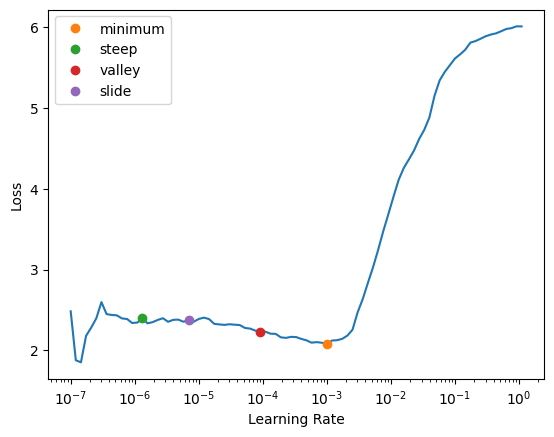

In [14]:
res = learn.lr_find(suggest_funcs=[minimum, steep, valley, slide])

In [15]:
import nltk
nltk.data.path.append(os.path.expanduser('~/nltk_data'))
nltk.data.find('tokenizers/punkt')

FileSystemPathPointer('/home/nghiapd/nltk_data/tokenizers/punkt')

In [ ]:
from fastai.callback.wandb import *

import wandb
wandb.init(project="fine-tune-llm-summeration")

fit_cbs = [
    Seq2SeqMetricsCallback(custom_metrics=summarization_metrics, calc_every="epoch"),
    WandbCallback(log_model=True)  # log_model=True nếu muốn lưu model lên wandb
]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

[nltk_data] Downloading package wordnet to /home/nghiapd/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/nghiapd/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/nghiapd/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [16]:
df = learn.fit_one_cycle(200, lr_max=res.valley, cbs=fit_cbs)

epoch,train_loss,valid_loss,rouge1,rouge2,rougeL,bertscore_precision,bertscore_recall,bertscore_f1,bleu,meteor,sacrebleu,time
0,2.169014,1.616870,0.405362,0.183001,0.289380,0.668831,0.730222,0.697764,0.154299,0.298878,2.768335,01:16
1,1.956621,1.467529,0.399689,0.190288,0.303694,0.665089,0.731125,0.695865,0.158959,0.317528,2.322678,00:07
2,1.757565,1.362743,0.421092,0.148718,0.276538,0.687562,0.730111,0.707854,0.166476,0.246399,2.899260,00:06
3,1.667105,1.305547,0.394735,0.120393,0.265975,0.688792,0.714916,0.700992,0.159179,0.202284,2.595873,00:05
4,1.615826,1.293014,0.399523,0.123047,0.272014,0.688842,0.717994,0.702806,0.158261,0.199206,2.621737,00:06
5,1.480951,1.272569,0.390506,0.106395,0.255277,0.702196,0.712972,0.707271,0.159912,0.136104,2.725475,00:05
6,1.387210,1.302992,0.425552,0.151665,0.296911,0.704437,0.731931,0.717247,0.181288,0.214823,3.631775,00:05
7,1.357481,1.277673,0.422807,0.138747,0.284440,0.703579,0.724379,0.713483,0.179276,0.200224,3.484702,00:05
8,1.294722,1.285277,0.410810,0.155269,0.294388,0.722153,0.719996,0.720778,0.246090,0.189598,8.359873,00:05
9,1.238624,1.248491,0.447888,0.188347,0.318524,0.723287,0.743433,0.732730,0.220694,0.269118,6.386566,00:05


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [17]:
res = learn.show_results(learner=learn)

,text,target,prediction
0,"Em mang thai được 35 tuần ngày dự sinh 18/9/2017 , lúc 22 tuần phát hiện nhiễm VGSV B , thăm khám tại BV Nhiệt đới tuần 28 bác sĩ bắt đầu cho uống thuốc ngừa cho bé tenofovir disoproxil fumarate 300mg ( invinorax ) . Nay thai 35 tuần e đi tái khám có làm xét nghiệm máu thấy có các chỉ số bất thường WBC : 12.95 , LYM% : 14.8 , NEU : 10.7 , NEU% : 77.8 . Creatinin 52 . Các chỉ số khác bình thường . Bác sĩ cho toà thuốc uống tenofovir disoproxil fumarate 300mg ( glonovir ) uống 2 tháng . Uống 2 tháng , có nghĩa là khi sinh xong em vẫn phải uống thuốc . Em muốn hỏi khi sinh xong nếu tiếp tục uống thuốc thì có cho bé bú được không ? Thuốc có ảnh hưởng tới bé không ? Cám ơn bác sĩ .",Mang thai bị nhiễm virus viêm gan b,"[ Trẻ 20 tuần đã khỏi bệnh viêm gì ?, Sau phẫu thuật giúp về sức khoa trực]"


In [18]:
learn.metrics = None
learn = learn.to_fp32()
learn.export(fname="bar_summary_export.pkl")

In [21]:
test_article = train_data_parquet.iloc[10]
test_article = test_article.text

# Loading Model to perform inferencing

In [22]:
infer = load_learner(fname="bar_summary_export.pkl")
res = infer.blurr_summarize(test_article)

In [23]:
res[0]['summary_texts']

' Bị viêm màng não mủ kèm theo nhiễm trùng máu ?'

In [27]:
train_data_parquet.iloc[10].summary

'Viêm màng não mủ'